# Feature selection

## Провести следующие виды отбора факторных признаков:

### 1. Отбор категориальных факторных признаков для задачи классификации на основе статистических критериев.
### 2. Отбор числовых факторных признаков для задачи классификации на основе статистических критериев.
### 3. Отбор факторных признаков для задачи регрессии (числовой результативный признак) на основе статистических критериев.
### 4. Применение метода RFE для отбора факторных признаков в задачах классификации и регрессии.
### 5. Оценка значимости признаков на основе модели.

## Методика выполнения задания:

### 1. Импортируем следующие модули и функции.

In [1]:
import os
from pandas import read_csv
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from numpy import mean
from numpy import std
from matplotlib import pyplot

## Раздел 1. Отбор категориальных факторных признаков для задачи классификации на основе статистических критериев

### Напишем функцию load_dataset(), которая на вход принимает название файла и выполняет следующее:
1. Читает файл с помощью функции read_csv() из модуля pandas и записывает результат в переменную data.

2. Сохраняет в переменную dataset значения признаков, обратившись к атрибуту values.

3. Выделяет в переменной dataset часть, которая относится к факторным признакам (все столбцы, кроме последнего), называет ее X, и часть, которая относится к результативному признаку (последний столбец), - y.

4. Возвращает X, y.

In [8]:
def load_dataset(filename):
	# Скачиваем датасет
	data = read_csv(filename, header=None)
	# выбираем данные
	dataset = data.values
	# делиим на входные и выходные данные
	X = dataset[:, :-1]
	y = dataset[:,-1]
	return X, y

Читаем файл breast-cancer.csv, воспользовавшись написанной функцией load_dataset().

In [9]:
X, y = load_dataset(r"D:\Projects\DS_Fst_course\Prepareted_data\breast-cancer.csv")

### Преобразуем факторные признаки в строковый тип данных с помощью функции astype(str).

In [10]:
X = X.astype(str)

### Разбьем выборку на обучающую и тестовую с помощью функции train_test_split(X, Y, test_size=test_size, random_state= random_state) из модуля sklearn.model_selection. 
Результат запишем в переменные X_train, X_test, Y_train, Y_test. 

Запишем в переменную test_size долю отложенной (тестовой) выборки.

Пусть она составляет 0,33. 

Зададим в переменной random_state ядро случайных чисел для воспроизводимости результатов. 

Пусть random_state = 1.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Посмотрим на размерность признаков тестовой и обучающей выборки, обратившись к атрибуту shape.

In [12]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


### Напишем функцию prepare_inputs(X_train, X_test), которая на вход принимает факторные признаки обучающей и тестовой выборки и выполняет следующие действия:

Создает объект oe для кодирования порядковых данных с помощью функции OrdinalEncoder() из модуля sklearn.preprocessing.

Обучает его на обучающей выборке с помощью метода fit().

Преобразует обучающую выборку с помощью метода transform() и результат записывает в переменную X_train_enc.

Преобразует тестовую выборку с помощью метода transform() и результат записывает в переменную X_test_enc.

Возвращает переменные X_train_enc, X_test_enc.

In [13]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

### Напишем функцию prepare_targets(y_train, y_test), которая на вход принимает результативный признак обучающей и тестовой выборки и выполняет следующие действия:

Создает объект le для кодирования результативного признака с помощью функции LabelEncoder() из модуля sklearn.preprocessing.

Обучает его на обучающей выборке с помощью метода fit().

Преобразует обучающую выборку с помощью метода transform() и результат записывает в переменную y_train_enc.

Преобразует тестовую выборку с помощью метода transform() и результат записывает в переменную y_test_enc.

Возвращает переменные y_train_enc, y_test_enc.

In [14]:
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

### Закодируем факторные признаки обучающего и тестового набора с помощью написанной функции prepare_inputs(). Результат запишите в переменные X_train_enc, X_test_enc.

In [15]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

### Закодируем результативный признак обучающего и тестового набора с помощью написанной функции prepare_targets(). Результат запишем в переменные y_train_enc, y_test_enc.

In [16]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Убеждаемся в том, что размерность признаков сохранилась.

In [17]:
print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


### Напишем функцию select_features(X_train, y_train, X_test, score_func, k), которая на вход принимает факторные признаки обучающей и тестовой выборки, результативный признак обучающей выборки, а также статистический критерий для отбора признаков score_func и параметр k, отвечающий за количество отбираемых признаков, и выполняет следующие действия:

Создает объект fs для отбора признаков на основе статистического критерия с помощью функции SelectKBest(score_func=score_func, k=k) из модуля sklearn.feature_selection.

Обучает его на факторных и результативном признаке обучающей выборки с помощью метода fit().

Преобразует факторные признаки обучающей выборки с помощью метода transform() и результат записывает в переменную X_train_fs.

Преобразует факторные признаки тестовой выборки с помощью метода transform() и результат записывает в переменную X_test_fs.

Возвращает переменные X_train_fs, X_test_fs, fs.

In [18]:
def select_features(X_train, y_train, X_test, score_func, k):
	fs = SelectKBest(score_func=score_func, k=k)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

### Применим написанную функцию select_features() и статистический критерий хи-квадрат, реализуемый в функции chi2 из модуля sklearn.feature_selection. Пусть будут отобраны все признаки (k='all').

In [19]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, chi2, k='all')

Выведем на экран значения критерия хи-квадрат для каждого признака, 
воспользовавшись инструкцией for, функцией print(), 
а также обратившись к атрибуту scores_ объекта fs.

In [20]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


### Нарисуем столбиковую диаграмму, воспользовавшись функциями bar(), show() из модуля matplotlib.pyplot.

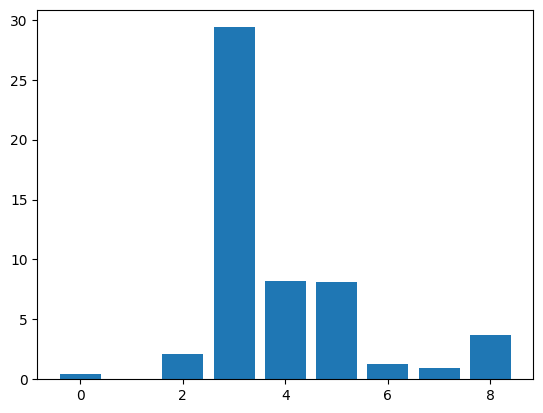

In [21]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Построим модель логистической регрессии на всех признаках обучающего набора и проверьте ее качество на тестовой выборке.

In [22]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc)

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


Отберем 4 признака на основе критерия хи-квадрат и построим модель логистической регрессии

In [24]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, chi2, k=4)

In [25]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


Применим написанную функцию select_features() и критерий взаимной информации,
реализуемый в функции mutual_info_classif из модуля sklearn.feature_selection. 
Пусть будут отобраны все признаки (k='all').

In [26]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, mutual_info_classif, k='all')

Выведем на экран значения критерия взаимной информации для каждого признака, 
воспользовавшись инструкцией for, функцией print(),
а также обратившись к атрибуту scores_ объекта fs.

In [27]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.019667
Feature 2: 0.037731
Feature 3: 0.025059
Feature 4: 0.029738
Feature 5: 0.042157
Feature 6: 0.039137
Feature 7: 0.007829
Feature 8: 0.014327


Нарисуем столбиковую диаграмму, воспользовавшись функциями bar(), 
show() из модуля matplotlib.pyplot.

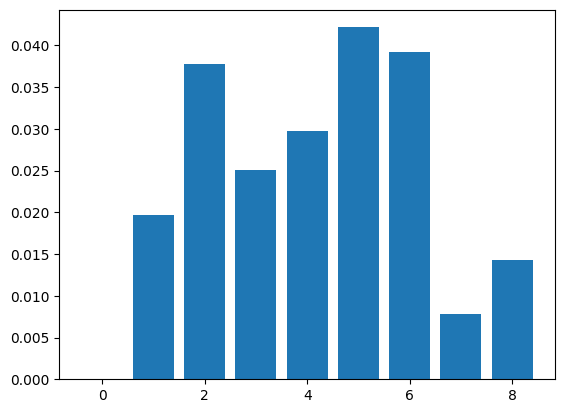

In [28]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Отберем 4 признака на основе критерия взаимной информации и постройте модель логистической регрессии. 

In [29]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


## Раздел 2. Отбор числовых факторных признаков для задачи классификации на основе статистических критериев

### Прочитаем файл pima-indians-diabetes.csv, воспользовавшись написанной функцией load_dataset().

In [30]:
X, y = load_dataset("D:\Projects\DS_Fst_course\Prepareted_data\pima-indians-diabetes.csv")

### Разобъем выборку на обучающую и тестовую с помощью функции train_test_split(X, Y, test_size=test_size, random_state= random_state) из модуля sklearn.model_selection. Результат запишем в переменные X_train, X_test, Y_train, Y_test. Запишем в переменную test_size долю отложенной (тестовой) выборки. Пусть она составляет 0,33. Зададим в переменной random_state ядро случайных чисел для воспроизводимости результатов. Пусть random_state = 1.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### Посмотрим на размерность признаков тестовой и обучающей выборки, обратившись к атрибуту shape.

In [34]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


### Применим написанную функцию select_features() и метод дисперсионного анализа, реализуемый в функции f_classif из модуля sklearn.feature_selection. Пусть будут отобраны все признаки (k='all').

In [35]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, k='all')

### Выведем на экран значения F критерия для каждого признака, воспользовавшись инструкцией for, функцией print(), а также обратившись к атрибуту scores_ объекта fs.

In [36]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


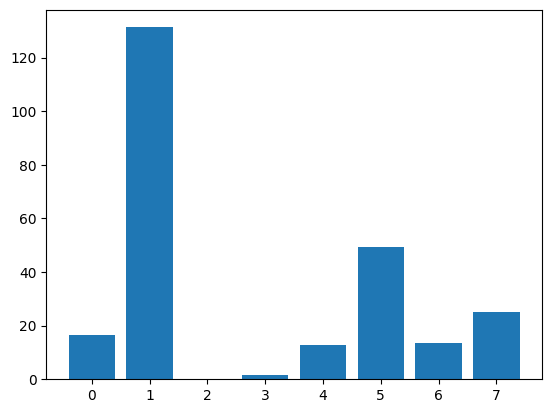

In [37]:
# Нарисуем столбиковую диаграмму, воспользовавшись функциями bar(), 
# show() из модуля matplotlib.pyplot. 
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Применим написанную функцию select_features() и критерий взаимной информации, реализуемый в функции mutual_info_classif из модуля sklearn.feature_selection. Пусть будут отобраны все признаки (k='all').

In [38]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, k='all')

In [39]:
# Выведем на экран значения критерия взаимной информации для каждого признака, 
# воспользовавшись инструкцией for, функцией print(), а также обратившись к атрибуту scores_ объекта fs.

In [40]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.109366
Feature 2: 0.009085
Feature 3: 0.028868
Feature 4: 0.038108
Feature 5: 0.080432
Feature 6: 0.016744
Feature 7: 0.079478


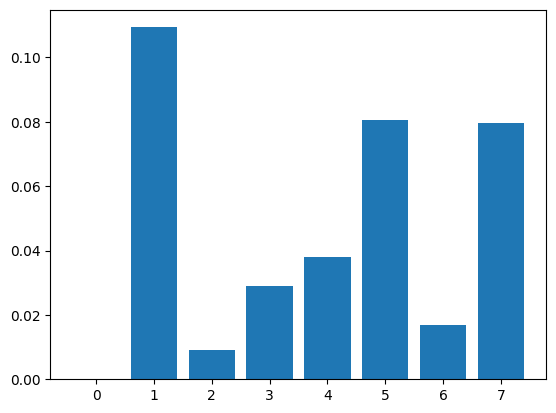

In [41]:
# Нарисуйте столбиковую диаграмму, воспользовавшись функциями bar(), 
# show() из модуля matplotlib.pyplot. 
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [42]:
# Построим модель логистической регрессии на всех признаках обучающего набора и 
# проверим ее качество на тестовой выборке.

In [43]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


### Отберем 4 признака на основе метода дисперсионного анализа и построим модель логистической регрессии.

In [44]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, k=4)

In [45]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


### Отберем 4 признака на основе критерия взаимной информации и построим модель логистической регрессии.

In [46]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, k=4)

In [47]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56
